# Chapter 4 - Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import gridspec

import warnings
warnings.simplefilter('ignore')

plt.style.use('ggplot')

colors= [c['color'] for c in plt.rcParams['axes.prop_cycle']]

## Logistic Regression

### Figure 4.1

In [2]:
default = pd.read_csv('../data/default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


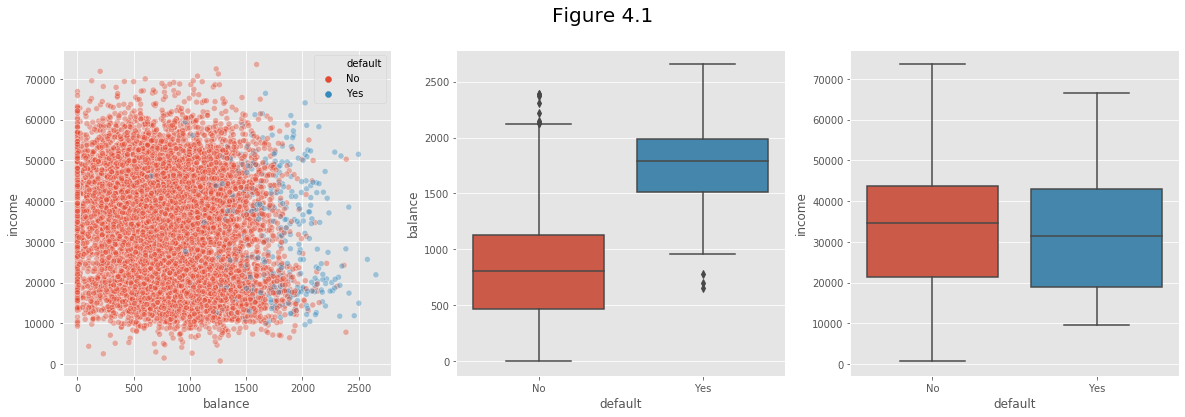

In [3]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
sns.scatterplot(data=default, x='balance', y='income', hue='default', ax=axes[0], alpha=0.4, )
sns.boxplot(data=default, x='default', y='balance', ax=axes[1])
sns.boxplot(data=default, x='default', y='income', ax=axes[2])
fig.suptitle('Figure 4.1', fontsize=(20));

### Figure 4.2

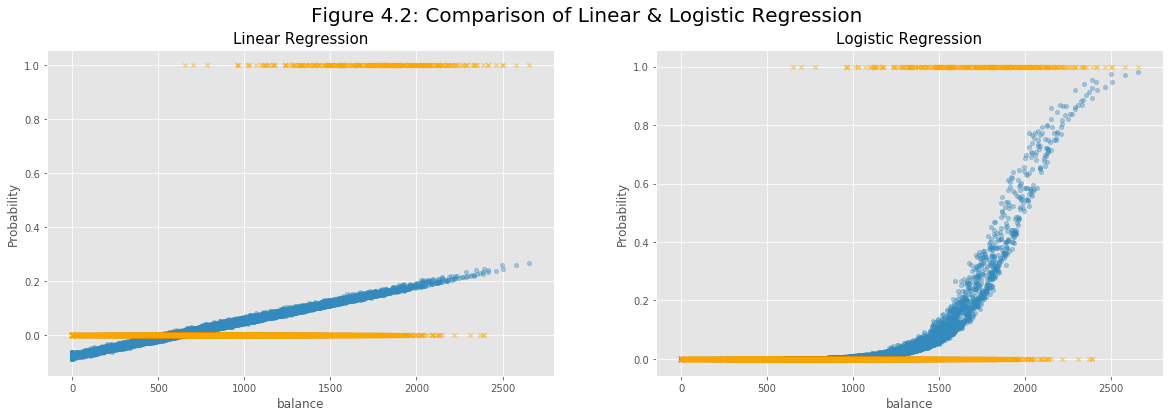

In [4]:
from sklearn.linear_model import LogisticRegression, LinearRegression

X = default[['balance','income']]
y, classes = default.default.factorize()

lin_reg = LinearRegression()
lin_reg.fit(X, y)

log_reg = LogisticRegression()
log_reg.fit(X, y)


preds_df = pd.DataFrame(
    {'balance': default.balance,
     'income': default.income,
     'lin_prob': lin_reg.predict(X), 
     'log_prob': log_reg.predict_proba(X)[:,1],
     'y': y
    })

fig, axes = plt.subplots(ncols=2, figsize=(20,6))
preds_df.plot.scatter(x='balance', y='lin_prob', ax=axes[0], alpha=0.4)
preds_df.plot.scatter(x='balance', y='y', ax=axes[0], c='orange', marker='x', alpha=0.4)
axes[0].set_title('Linear Regression', fontsize=15)
axes[0].set_ylabel('Probability')

preds_df.plot.scatter(x='balance', y='log_prob', ax=axes[1], alpha=0.4)
preds_df.plot.scatter(x='balance', y='y', ax=axes[1], c='orange', marker='x', alpha=0.4)
axes[1].set_title('Logistic Regression', fontsize=15)
axes[1].set_ylabel('Probability')

fig.suptitle('Figure 4.2: Comparison of Linear & Logistic Regression', fontsize=20);

### Table 4.1

In [5]:
sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.459      
Dependent Variable: y                AIC:              1584.9663  
Date:               2020-04-13 14:08 BIC:              1606.5973  
No. Observations:   10000            Log-Likelihood:   -789.48    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      4.5409e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
const      -11.5405    0.4348  -26.5437  0.0000  -12.3926  -10.6883
balance      0.0056    0.0002   24.8354  0.0000    0.0052    0.0061
income       0.0000    0.0000    4.1741  0.0000    0.0000    0.0000
==================================================================

"""

### Table 4.2

In [6]:
X, student_classes = default['student'].factorize()
X = pd.Series(X, name='student[yes]')
sm_model = sm.Logit(y, sm.add_constant(X))
sm_model = sm_model.fit(disp=0)
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.004     
Dependent Variable: y                AIC:              2912.6831 
Date:               2020-04-13 14:08 BIC:              2927.1037 
No. Observations:   10000            Log-Likelihood:   -1454.3   
Df Model:           1                LL-Null:          -1460.3   
Df Residuals:       9998             LLR p-value:      0.00054161
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -3.5041   0.0707 -49.5541 0.0000 -3.6427 -3.3655
student[yes]      0.4049   0.1150   3.5202 0.0004  0.1795  0.6303
=================================================================

"""

### Table 4.3

In [7]:
X = default[['income','balance','student']]
X['student[yes]'] = X['student'].replace({'Yes': 1, 'No': 0})
X.drop(columns=['student'],inplace=True)
sm_model = sm.Logit(y, sm.add_constant(X))
sm_model = sm_model.fit(disp=0)
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: y                AIC:              1579.5448  
Date:               2020-04-13 14:08 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
const           -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
income            0.0000   0.0000   0.3698 0.7115  -0.0000  0.0000
balance           0.0057   0.0002  24.7365 0.0000   0.0053  0.0062
student[yes]     -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
==================================================================

"""

### Figure 4.3

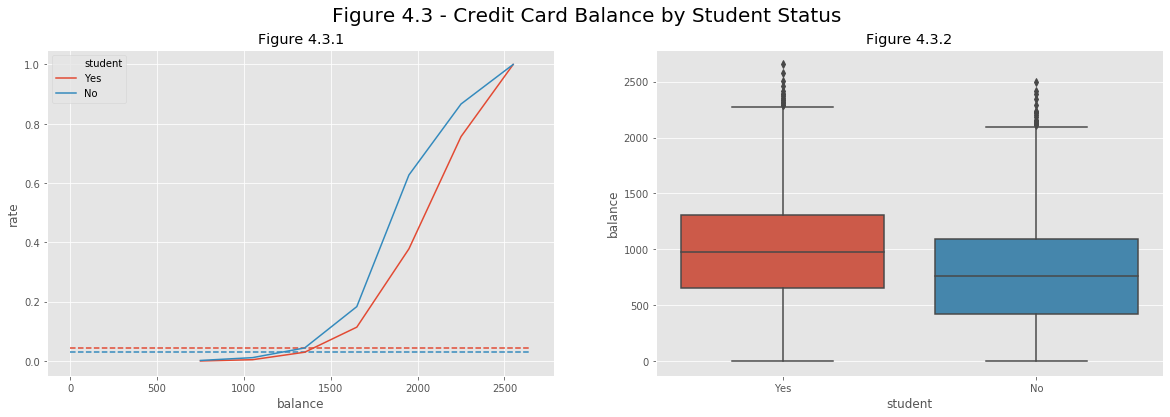

In [8]:
X = default[['income','balance','student']]
y = default.default.replace({'Yes': 1, 'No': 0})

# Calculate default rate per balance bucket
bin_size=300
bins = list(range(0, 3000, bin_size))
X['balance_binned'] = pd.cut(X.balance, bins=bins, include_lowest=True)

i=0
default_rate = {}
for (interval, student), group_df in X.groupby(['balance_binned','student']):
    mid_point = interval.right - bin_size/2
    default_rate[i] = {
        'balance': mid_point,
        'rate': y.loc[group_df.index].mean(),
        'student': student
    }
    
    i += 1
    
default_rate_df = pd.DataFrame.from_dict(default_rate, orient='index')

# Mean default rate per student status
means = default.groupby('student').apply(lambda x: x.default.replace({'Yes': 1, 'No': 0}).mean())

fig, axes = plt.subplots(ncols=2, figsize=(20,6))
sns.lineplot(data=default_rate_df.query('balance >= 500'), x='balance', y='rate', hue='student', hue_order=['Yes','No'], ax=axes[0])
sns.boxplot(data=default, x='student', y='balance', order=['Yes','No'], ax=axes[1])

axes[0].hlines(means['Yes'], 0, default.balance.max(), colors[0], '--')
axes[0].hlines(means['No'], 0, default.balance.max(), colors[1], '--')

axes[0].set_title('Figure 4.3.1')
axes[1].set_title('Figure 4.3.2')

fig.suptitle('Figure 4.3 - Credit Card Balance by Student Status', fontsize=20);

**Insight**

These two figures describe the reason why in Table 4.2 student has a positive coeficient, meaning that being a student is associated with an _increase_ in probability of default, while Table 4.3 shows a negative coeficient, implying a _decrease_ in probability of default when being a student. 

The reason for this is because of an effect called _**confounding**_. 

The negative coefficient for `student` in the multiple logistic regression indicates that for a _fixed value_ of `balance` _and_ `income`, a student is less likely to default than a non-student.

In Figure 4.3.1 we see that for all values of balance, the default rate of students is equal or lower than for non students. At the bottom of the figure we see the default rates for all values of balance and income, which shows students are _overall_ more likely to default. 

Figure 4.3.2 shows why - `student` and `balance` are correlated. And we know that `balance` and `default` are also correlated. 

Thus, a student is more likely to default on their credit card than non-students. However, a student is less likely to default than a non-student with the same credit card balance. 

### Multi-class Logistic Regression vs LDA

Multi-class logistic regression is possible, but not popular - we will rather focus on LDA for that. 

## Linear Discriminant Analysis

**Overview**

We model the distribution of the predictors X separately in each of the response classes (i.e. given $Y$ ), and then use Bayes’ theorem to flip these around into estimates for $\text{Pr}(Y = k|X = x)$. 

**Why?**

* Logistic regression on well separated classes have unstable parameters - LDA does not. 
* If $n$ is small and distributions of features is approx. normal then LDA is more stable than Logistic regression.
* Better for more than 2 classes. 

**Assumptions**

The LDA classifier results from assuming that the observations _within each class_ come from a **normal distribution** with a **class-specific mean** vector and a **common variance σ2**

**Linear Discriminant Function**

$$
\hat{\delta_k} = x \cdot \frac{\hat{\mu}_k}{\hat{\sigma}_k^2} - \frac{\hat{\mu}_k^2}{2\hat{\sigma}_k^2} + log(\hat{\pi_k}
$$

### Figure 4.4

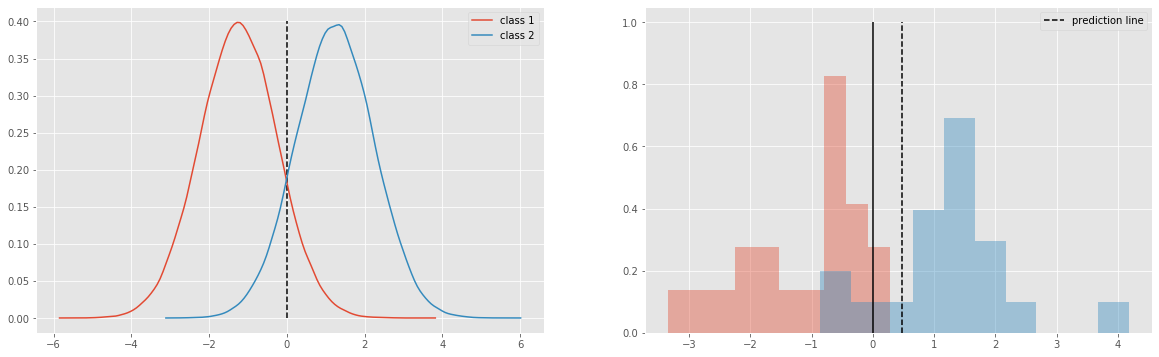

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

mu1 = -1.25
mu2 = 1.25
var1 = var2 = 1

class_1 = np.random.normal(mu1, var1, 100000)
class_2 = np.random.normal(mu2, var2, 100000)

sample_1 = np.random.choice(class_1, 20)
sample_2 = np.random.choice(class_2, 20)

X = np.concatenate([sample_1, sample_2]).reshape(-1, 1)
y = [0]*20 + [1]*20

lda = LinearDiscriminantAnalysis().fit(X, y)
preds = lda.predict(X)

fig, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.kdeplot(class_1, ax=axes[0], label='class 1')
sns.kdeplot(class_2, ax=axes[0], label='class 2')
axes[0].vlines(0, 0, 0.4, 'k','--')

axes[1].hist(sample_1, alpha=0.4, density=True)
axes[1].hist(sample_2, alpha=0.4, density=True)
axes[1].vlines(0, 0, 1, 'k',)
axes[1].vlines(preds.mean(), 0, 1, 'k','--', label='prediction line')

plt.legend()
plt.show()

### Figure 4.5

In [10]:
%matplotlib inline

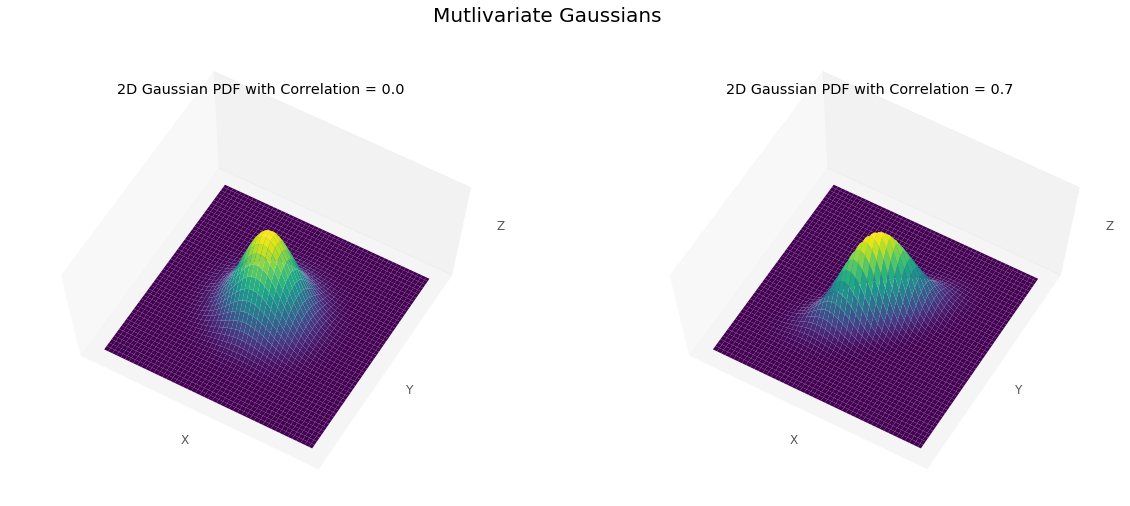

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

means = [0,0]
var = 5

cov1 = 0
cov2 = 3.5

# Covariance matrix of uncorrelated multivariate Gaussian
cov_matrix1 = [[var, cov1],
               [cov1, var]]

# Covariance matrix of correlated Gaussians
cov_matrix2 = [[var, cov2],
               [cov2,var]]

corr1 = cov1/var
corr2 = cov2/var

mv_norm1 = stats.multivariate_normal(means, cov_matrix1)
mv_norm2 = stats.multivariate_normal(means, cov_matrix2)

n_points = 200
x = np.linspace(-10,10,n_points)
y = np.linspace(-10,10,n_points)

# Create 2D meshgrid
X, Y = np.meshgrid(x,y)
arr = np.stack([X, Y], axis=2)

# Get PDFs of Multivariate Gaussians at each point on the 2D grid
# and set as Z-dimension
Z1 = mv_norm1.pdf(arr)
Z2 = mv_norm2.pdf(arr)


#Make a 3D plot
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

el = 70
az = -60

for ax, Z, corr in zip([ax1, ax2], [Z1, Z2], [corr1, corr2]):

    ax.view_init(el, az)
    ax.grid(False)
    
    ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('2D Gaussian PDF with Correlation = {}'.format(corr))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_facecolor('white')

fig.suptitle('Mutlivariate Gaussians', fontsize=20)
plt.show()

### Figure 4.3

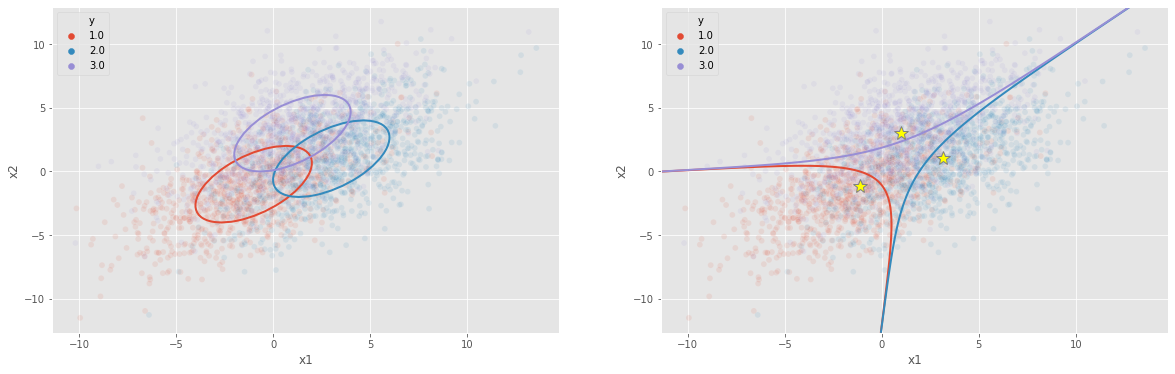

In [50]:
from matplotlib.patches import Ellipse
from matplotlib import colors as c

m1,m2,m3 = [-1,-1], [3,1], [1,3]

var = 9
cov = 5
cov_matrix = [[var, cov],[cov,var]]

# Eigenvalues of covariance matrix is orthogonal variances
# Eigenvectors indicate direction of variance
eivals, eivecs = np.linalg.eig(cov_matrix)
eivals = np.sqrt(eivals)


N = 1000
rv1 = np.random.multivariate_normal(m1, cov_matrix, size=N)
rv2 = np.random.multivariate_normal(m2, cov_matrix, size=N)
rv3 = np.random.multivariate_normal(m3, cov_matrix, size=N)

X = np.vstack([rv1, rv2, rv3])
y = np.array([1]*N + [2]*N + [3]*N).reshape(-1,1)


fig, axes = plt.subplots(ncols=2, figsize=(20,6))

# Left hand side
ax = axes[0]
for i, m in enumerate([m1,m2,m3]):
    ell = Ellipse(xy=tuple(m), width=eivals[0]*2, height=eivals[1]*2, 
                  angle=np.rad2deg(np.arccos(eivecs[0, 0])), color=colors[i], linewidth=2)
    ell.set_facecolor('none')
    ax.add_artist(ell)
    

df = pd.DataFrame(np.hstack((X,y)), columns=['x1','x2','y'])
sns.scatterplot(x='x1', y='x2', hue='y', data=df, alpha=0.1, ax=ax, palette=colors[:3])

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()


# Right hand side
ax = axes[1]
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

xx, yy = np.meshgrid(np.linspace(x_min, x_max, N),
                     np.linspace(y_min, y_max, N))

Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])

sns.scatterplot(x='x1', y='x2', hue='y', data=df, alpha=0.1, ax=ax, palette=colors[:3])

# ax.pcolormesh(xx, yy, Z, cmap='viridis', norm=c.Normalize(0., 1.), zorder=0)
ax.contour(xx, yy, Z[:, 0].reshape(xx.shape), [0.5], linewidths=2., colors=colors[0])
ax.contour(xx, yy, Z[:, 1].reshape(xx.shape), [0.5], linewidths=2., colors=colors[1])
ax.contour(xx, yy, Z[:, 2].reshape(xx.shape), [0.5], linewidths=2., colors=colors[2])

# means
ax.plot(lda.means_[0][0], lda.means_[0][1],
         '*', color='yellow', markersize=15, markeredgecolor='grey')
ax.plot(lda.means_[1][0], lda.means_[1][1],
         '*', color='yellow', markersize=15, markeredgecolor='grey')
ax.plot(lda.means_[2][0], lda.means_[2][1],
         '*', color='yellow', markersize=15, markeredgecolor='grey')

plt.show()

### Finding  values for `var` and `cor`

In [223]:
m1,m2,m3 = [-1,-1], [3,1], [1,3]

def plot_ellipses(var,cov):
    fig, ax = plt.subplots(figsize=(12,8))
    cov_matrix = [[var, cov],[cov,var]]

    # Eigenvalues of covariance matrix is orthogonal variances
    # Eigenvectors indicate direction of variance
    eivals, eivecs = np.linalg.eig(cov_matrix)
    eivals = np.sqrt(eivals)
    
    for i, m in enumerate([m1,m2,m3]):
        ell = Ellipse(xy=tuple(m), width=eivals[0]*2, height=eivals[1]*2, 
                      angle=np.rad2deg(np.arccos(eivecs[0, 0])), color=colors[i], linewidth=2)
        ell.set_facecolor('none')
        ax.add_artist(ell)
        
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    plt.show()
        
interact(plot_ellipses, var=(0, 10, 0.2), cov=(0, 10, 0.2))

interactive(children=(FloatSlider(value=5.0, description='var', max=10.0, step=0.2), FloatSlider(value=5.0, de…

<function __main__.plot_ellipses(var, cov)>

## Table 4.4

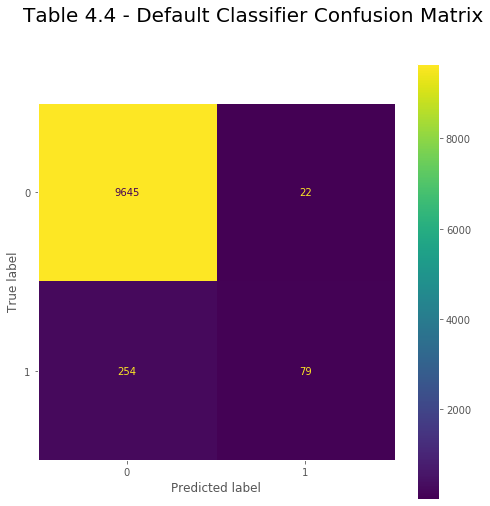

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

X = default[['income','balance','student']]
X['student[yes]'] = X['student'].replace({'Yes': 1, 'No': 0})
X.drop(columns='student', inplace=True)

X = StandardScaler().fit_transform(X)

y = default.default.replace({'Yes': 1, 'No': 0})

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Table 4.4 - Default Classifier Confusion Matrix', fontsize=20)
ax.grid(None)
plot_confusion_matrix(lda, X, y, ax=ax, values_format='.0f');

## Figure 4.7

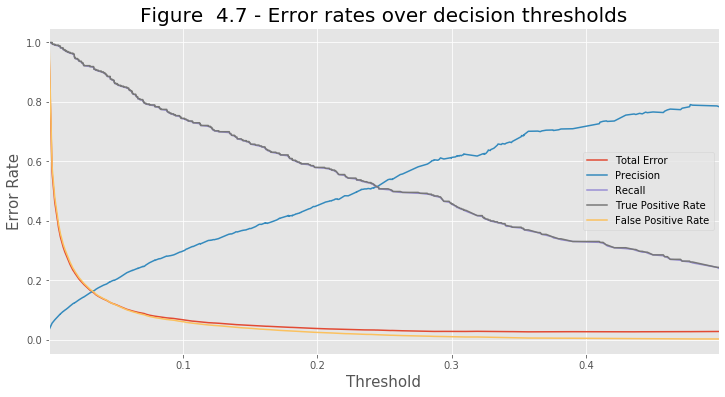

In [95]:
from sklearn.metrics import roc_curve
N = 100

probs = lda.predict_proba(X)[:,1]

FPR, TPR, thresholds = roc_curve(y, probs)

error_rates = {}
for fpr, tpr, thresh in zip(FPR, TPR, thresholds):
    
    preds = np.where(probs>thresh, 1, 0)
    error_rates[thresh] = {
        'Total Error': 1-accuracy_score(y, preds),
        'Precision': precision_score(y,preds),
        'Recall': recall_score(y,preds),
        'True Positive Rate': tpr,
        'False Positive Rate': fpr,
    }
    
errors = pd.DataFrame.from_dict(error_rates, orient='index')
errors.sort_index().loc[:0.5].plot(figsize=(12,6))
plt.title('Figure  4.7 - Error rates over decision thresholds', fontsize=20)
plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Error Rate', fontsize=15)
plt.show()

## Figure 4.8

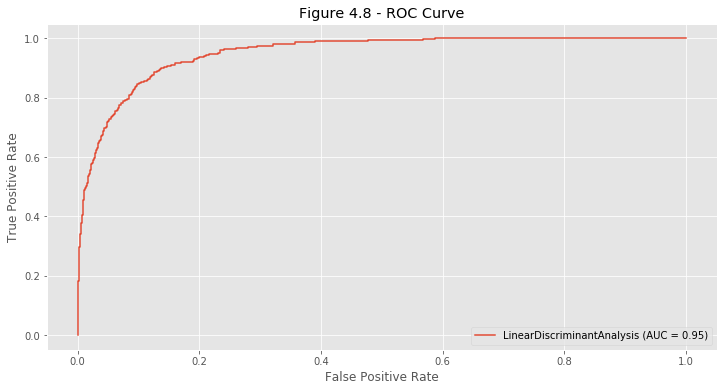

In [97]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Figure 4.8 - ROC Curve')
plot_roc_curve(lda, X, y, ax=ax);

# Quadtratic Discriminant Analysis (QDA)

Like LDA, the QDA classifier results from assuming that the observations from each class are drawn from a Gaussian distribution, and plugging estimates for the parameters into Bayes’ theorem in order to perform prediction. However, unlike LDA, **QDA assumes that each class has its own covariance matrix**.


The discriminant function (see 4.23 in book) is now quadtratic w.r.t $x$, hence the name.  


**When choose QDA vs LDA?**

* QDA is more flexible --> lower bias, but usually higher variance
* More flexibility comes from more parameters (class-covariance matrices), which means more computationally intensive.
* If LDA assumption of shared covariance is off then can lead to high bias.
* Small training set --> LDA (better variance)
* Large training set --> QDA (better bias, variance not so much of an issue)

## Figure 4.9

We generate two datasets:
1. Two classes share a covariance matrix --> have the same variance and correlation in $X_1$ & $X_2$
2. Two classes have their own covariance matrix

Then fit an LDA and QDA on each dataset and plot the decision boundary at a threshold of 0.5. 

Where classes share a covariance matrix, we know the Bayes (optimal) decision boundary to be linear. The QDA fits an unneccesarily complex decision boundary while the LDA approximates it correctly. 

Where classes have their own covariance matrices the LDA has a high bias, while the QDA has a lower bias.

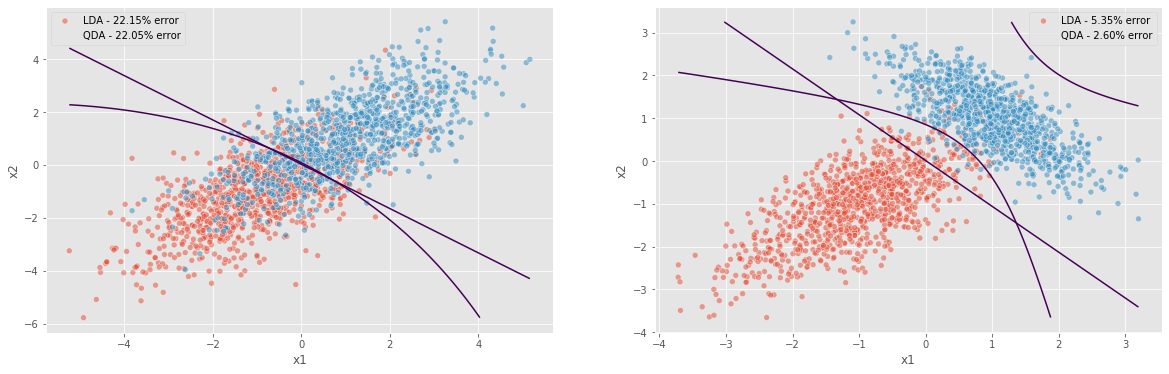

In [203]:
from sklearn.metrics import accuracy_score

def create_data(m1, m2, cov1, cov2, N):

    rv1 = np.random.multivariate_normal(m1, cov1, size=N)
    rv2 = np.random.multivariate_normal(m2, cov2, size=N)

    X = np.vstack([rv1, rv2])
    y = np.array([1]*N + [2]*N).reshape(-1,1)
    
    return X, y
   
    
def make_plot(X, y, ax, N):
    
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()

    lda.fit(X, y)
    qda.fit(X, y)

    x_ = np.linspace(X[:,0].min(), X[:,0].max(), N)
    y_ = np.linspace(X[:,1].min(), X[:,1].max(), N)

    xx, yy = np.meshgrid(x_, y_)
    grid = np.c_[xx.ravel(), yy.ravel()]

    lda_probs = lda.predict_proba(grid)[:,1]
    qda_probs = qda.predict_proba(grid)[:,1]
    
    lda_preds = lda.predict(X)
    qda_preds = qda.predict(X)
    
    lda_err = 1-accuracy_score(y, lda_preds)
    qda_err = 1-accuracy_score(y, qda_preds)
    
    df = pd.DataFrame(np.hstack((X,y)), columns=['x1','x2','y'])
    sns.scatterplot(x='x1', y='x2', hue='y', data=df, alpha=0.5, ax=ax, palette=colors[:2])
    ax.contour(xx, yy, lda_probs.reshape(N,N), [0.5])
    ax.contour(xx, yy, qda_probs.reshape(N,N), [0.5])
    ax.legend(['LDA - {:.2f}% error'.format(lda_err*100),
                'QDA - {:.2f}% error'.format(qda_err*100)])


N = 1000
m1 = [-1,-1]
m2 = [1,1]

# Two gaussians with 0.7 correlation
var = 2
cor = 0.7
cov_shared = [[var, var*cor],
              [var*cor, var]]
X1, y1 = create_data(m1, m2, cov_shared, cov_shared, N)

var1 = .8
cor1 = 0.7
cov1 = [[var1, var1*cor1],
        [var1*cor1, var1]]

var2 = .5
cor2 = -0.7
cov2 = [[var2, var2*cor2],
        [var2*cor2, var2]]
X2, y2 = create_data(m1, m2, cov1, cov2, N)


fig, axes = plt.subplots(ncols=2, figsize=(20,6))
make_plot(X1, y1, axes[0], N)
make_plot(X2, y2, axes[1], N)

# Choosing A Classifier

So far, considered three classification models:
1. $K$-Nearest Neighbours (KNN)
2. Logistic Regression (LR)
3. Linear (and Quadratic) Discriminant Analysis (LRA & QDA)


Choosing which depends on the data at hand - some useful things to consider

* Logistic Regression & LDA are very similar, but **LR will outperform LDA if assumption of each predictor (feature) being drawn from a Gaussian distribution is not met** and vice-versa.
* KNN will outperform both if decision boundary is highly non-linear, but doesn't tell us which predictors are important.
* QDA serves as compromise between LDA/LR and KNN:
    - Can model wider number of problems
    - Can tell us which features are important
    - But still assumes quadratic decision boundary - limited in non-linearity

## Figure 4.11

_Skipped - way too much guess work involved_